# Carregando Bibliotecas

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Carregando os Dados

In [155]:
clientes = pd.read_csv('CLIENTES.csv',  delimiter=';')
filias = pd.read_csv('FILIAIS.csv', delimiter=';')
produtos = pd.read_csv('PRODUTOS.csv', delimiter=';')
vendas_produtos = pd.read_csv('VENDAS_PRODUTOS.csv', delimiter=';')
vendas = pd.read_csv('VENDAS.csv', delimiter=';')

In [156]:
clientes.head(3)

,ID_CLIENTE,NOME_CLIENTE,CIDADE,UF
0,1,SILVIA SILVA ALENCAR,CURITIBA,PR
1,2,ROSANA MATOS,CURITIBA,PR
2,3,JULIANA SALAZAR VALE,CURITIBA,PR


In [157]:
filias.head(3)

,ID_FILIAL,NOME_FILIAL,CIDADE,UF
0,1,BATEL,CURITIBA,PR
1,2,AGUA VERDE,CURITIBA,PR
2,3,UBERABA,CURITIBA,PR


In [158]:
produtos.head()

,ID_PRODUTO,NOME_PRODUTO,PRECO_TABELA
0,1,CAMISETA BASICA DE ALGODAO,"50,00"
1,2,CALCA JEANS SKINNY,"120,00"
2,3,BLAZER DE LINHO,"250,00"
3,4,VESTIDO MIDI ESTAMPADO,"180,00"
4,5,TENIS DE CORRIDA,"300,00"


In [159]:
vendas_produtos.head(3)

,ID_VENDA,ID_PRODUTO,QUANTIDADE,VALOR_UNITARIO_VENDA_PRODUTO,VALOR_VENDA_PRODUTO
0,1,6,1,"150,00","150,00"
1,2,20,2,"24,50","49,00"
2,2,2,2,"120,00","240,00"


In [160]:
vendas.head()

,ID_VENDA,DATA_VENDA,ID_FILIAL,ID_CLIENTE,VALOR_VENDA
0,1,01/10/2023,1,1456,"150,00"
1,2,02/10/2023,1,527,"521,80"
2,3,02/10/2023,1,1564,"147,00"
3,4,02/10/2023,1,1079,"284,90"
4,5,02/10/2023,1,1015,"213,40"


# Unindo os DataFrames

In [161]:
#Unindo CLIENTES com VENDAS 
df_clientes_vendas = pd.merge(vendas, clientes, on='ID_CLIENTE', how='left')
df_clientes_vendas.head()


,ID_VENDA,DATA_VENDA,ID_FILIAL,ID_CLIENTE,VALOR_VENDA,NOME_CLIENTE,CIDADE,UF
0,1,01/10/2023,1,1456,"150,00",MARIA ASSAD MORAIS,CURITIBA,PR
1,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR
2,3,02/10/2023,1,1564,"147,00",MARCIA TAVARES SOUZA,CURITIBA,PR
3,4,02/10/2023,1,1079,"284,90",MARIANA PESSOA COELHO TOLEDO,CURITIBA,PR
4,5,02/10/2023,1,1015,"213,40",FLAVIA BARRETO PIRES,CURITIBA,PR


In [162]:
#Unindo CLIENTES_VENDAS com FILIAS  
df_clientes_vendas_filias = pd.merge(df_clientes_vendas, filias, on='ID_FILIAL', how='left')
df_clientes_vendas_filias.head(10)


,ID_VENDA,DATA_VENDA,ID_FILIAL,ID_CLIENTE,VALOR_VENDA,NOME_CLIENTE,CIDADE_x,UF_x,NOME_FILIAL,CIDADE_y,UF_y
0,1,01/10/2023,1,1456,"150,00",MARIA ASSAD MORAIS,CURITIBA,PR,BATEL,CURITIBA,PR
1,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR
2,3,02/10/2023,1,1564,"147,00",MARCIA TAVARES SOUZA,CURITIBA,PR,BATEL,CURITIBA,PR
3,4,02/10/2023,1,1079,"284,90",MARIANA PESSOA COELHO TOLEDO,CURITIBA,PR,BATEL,CURITIBA,PR
4,5,02/10/2023,1,1015,"213,40",FLAVIA BARRETO PIRES,CURITIBA,PR,BATEL,CURITIBA,PR
5,6,02/10/2023,1,255,"143,10",DIOGO MARQUES,CURITIBA,PR,BATEL,CURITIBA,PR
6,7,02/10/2023,1,1524,"776,00",VITORIA RODRIGUES ESCOBAR,CURITIBA,PR,BATEL,CURITIBA,PR
7,8,02/10/2023,1,1800,"339,50",PAULO OLIVEIRA,CURITIBA,PR,BATEL,CURITIBA,PR
8,9,02/10/2023,1,1411,"259,20",ROSANA SIQUEIRA,JOINVILLE,SC,BATEL,CURITIBA,PR
9,10,02/10/2023,1,100,"707,70",CLAUDIO FEITOSA BORBA SEVERO,CURITIBA,PR,BATEL,CURITIBA,PR


In [163]:
df_completo = pd.merge(df_clientes_vendas_filias, vendas_produtos, on='ID_VENDA', how='left')
df_completo.head()

,ID_VENDA,DATA_VENDA,ID_FILIAL,ID_CLIENTE,VALOR_VENDA,NOME_CLIENTE,CIDADE_x,UF_x,NOME_FILIAL,CIDADE_y,UF_y,ID_PRODUTO,QUANTIDADE,VALOR_UNITARIO_VENDA_PRODUTO,VALOR_VENDA_PRODUTO
0,1,01/10/2023,1,1456,"150,00",MARIA ASSAD MORAIS,CURITIBA,PR,BATEL,CURITIBA,PR,6,1,"150,00","150,00"
1,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,20,2,"24,50","49,00"
2,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,2,2,"120,00","240,00"
3,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,10,3,"77,60","232,80"
4,3,02/10/2023,1,1564,"147,00",MARCIA TAVARES SOUZA,CURITIBA,PR,BATEL,CURITIBA,PR,6,1,"147,00","147,00"


In [164]:
df_final = pd.merge(df_completo, produtos, on='ID_PRODUTO', how='left')
df_final.head()

,ID_VENDA,DATA_VENDA,ID_FILIAL,ID_CLIENTE,VALOR_VENDA,NOME_CLIENTE,CIDADE_x,UF_x,NOME_FILIAL,CIDADE_y,UF_y,ID_PRODUTO,QUANTIDADE,VALOR_UNITARIO_VENDA_PRODUTO,VALOR_VENDA_PRODUTO,NOME_PRODUTO,PRECO_TABELA
0,1,01/10/2023,1,1456,"150,00",MARIA ASSAD MORAIS,CURITIBA,PR,BATEL,CURITIBA,PR,6,1,"150,00","150,00",SAIA PLISSADA,"150,00"
1,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,20,2,"24,50","49,00",MEIAS COLORIDAS,"25,00"
2,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,2,2,"120,00","240,00",CALCA JEANS SKINNY,"120,00"
3,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,10,3,"77,60","232,80",BONE DE BEISEBOL,"80,00"
4,3,02/10/2023,1,1564,"147,00",MARCIA TAVARES SOUZA,CURITIBA,PR,BATEL,CURITIBA,PR,6,1,"147,00","147,00",SAIA PLISSADA,"150,00"


In [165]:
df_final.rename(columns={'CIDADE_x':'CIDADE_CLIENTE', 'UF_x':'UF_CLIENTE', 'CIDADE_y':'CIDADE_FILIAL','UF_y':'UF_FILIAL'}, inplace=True)
df_final.head()


,ID_VENDA,DATA_VENDA,ID_FILIAL,ID_CLIENTE,VALOR_VENDA,NOME_CLIENTE,CIDADE_CLIENTE,UF_CLIENTE,NOME_FILIAL,CIDADE_FILIAL,UF_FILIAL,ID_PRODUTO,QUANTIDADE,VALOR_UNITARIO_VENDA_PRODUTO,VALOR_VENDA_PRODUTO,NOME_PRODUTO,PRECO_TABELA
0,1,01/10/2023,1,1456,"150,00",MARIA ASSAD MORAIS,CURITIBA,PR,BATEL,CURITIBA,PR,6,1,"150,00","150,00",SAIA PLISSADA,"150,00"
1,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,20,2,"24,50","49,00",MEIAS COLORIDAS,"25,00"
2,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,2,2,"120,00","240,00",CALCA JEANS SKINNY,"120,00"
3,2,02/10/2023,1,527,"521,80",ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,10,3,"77,60","232,80",BONE DE BEISEBOL,"80,00"
4,3,02/10/2023,1,1564,"147,00",MARCIA TAVARES SOUZA,CURITIBA,PR,BATEL,CURITIBA,PR,6,1,"147,00","147,00",SAIA PLISSADA,"150,00"


# Análise Exploratória dos Dados

In [166]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18451 entries, 0 to 18450
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   ID_VENDA                      18451 non-null  int64 
 1   DATA_VENDA                    18451 non-null  object
 2   ID_FILIAL                     18451 non-null  int64 
 3   ID_CLIENTE                    18451 non-null  int64 
 4   VALOR_VENDA                   18451 non-null  object
 5   NOME_CLIENTE                  18451 non-null  object
 6   CIDADE_CLIENTE                18451 non-null  object
 7   UF_CLIENTE                    18451 non-null  object
 8   NOME_FILIAL                   18451 non-null  object
 9   CIDADE_FILIAL                 18451 non-null  object
 10  UF_FILIAL                     18451 non-null  object
 11  ID_PRODUTO                    18451 non-null  int64 
 12  QUANTIDADE                    18451 non-null  int64 
 13  VALOR_UNITARIO_V

## Transformando Dados

Primeira transformação necessária foi nas variáveis que represetanm valores monetários. 

Primeiramente, formatei a representação decimal para ficar com a formataçãoa aceita pela Biblioteca Pandas do Python

Segundo, transformei os dados para os tipos que facilitariam toda a análise, por exemplo, 

ID_VENDA e ID_CLIENTE, em object, 

DATA_VENDA em datetime,

Variáveis de valores momentarios em float,

QUANTIDADE em int

In [167]:
#Formantando os valores monetário, para que o ponto (.) seja o separador de decimal e não exista separador de milhar 
df_final['VALOR_VENDA'] = df_final['VALOR_VENDA'].str.replace('.', '', regex=False)
df_final['VALOR_UNITARIO_VENDA_PRODUTO'] = df_final['VALOR_UNITARIO_VENDA_PRODUTO'].str.replace('.', '', regex=False)
df_final['VALOR_VENDA_PRODUTO'] = df_final['VALOR_VENDA_PRODUTO'].str.replace('.', '', regex=False)
df_final['PRECO_TABELA'] = df_final['PRECO_TABELA'].str.replace('.', '', regex=False)


df_final['VALOR_VENDA'] = df_final['VALOR_VENDA'].str.replace(',', '.', regex=False)
df_final['VALOR_UNITARIO_VENDA_PRODUTO'] = df_final['VALOR_UNITARIO_VENDA_PRODUTO'].str.replace(',', '.', regex=False)
df_final['VALOR_VENDA_PRODUTO'] = df_final['VALOR_VENDA_PRODUTO'].str.replace(',', '.', regex=False)
df_final['PRECO_TABELA'] = df_final['PRECO_TABELA'].str.replace(',', '.', regex=False)

In [168]:
#Transformando os tipos de dados 
df_final[['ID_VENDA', 'ID_CLIENTE', 'ID_PRODUTO', 'ID_FILIAL']] = df_final[['ID_VENDA', 'ID_CLIENTE', 'ID_PRODUTO', 'ID_FILIAL']].astype(str)
df_final[['VALOR_VENDA', 'VALOR_UNITARIO_VENDA_PRODUTO', 'VALOR_VENDA_PRODUTO', 'PRECO_TABELA']] = df_final[['VALOR_VENDA', 'VALOR_UNITARIO_VENDA_PRODUTO', 'VALOR_VENDA_PRODUTO', 'PRECO_TABELA']].astype(float)
df_final['DATA_VENDA'] = pd.to_datetime(df_final['DATA_VENDA'], dayfirst=True)

In [169]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18451 entries, 0 to 18450
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID_VENDA                      18451 non-null  object        
 1   DATA_VENDA                    18451 non-null  datetime64[ns]
 2   ID_FILIAL                     18451 non-null  object        
 3   ID_CLIENTE                    18451 non-null  object        
 4   VALOR_VENDA                   18451 non-null  float64       
 5   NOME_CLIENTE                  18451 non-null  object        
 6   CIDADE_CLIENTE                18451 non-null  object        
 7   UF_CLIENTE                    18451 non-null  object        
 8   NOME_FILIAL                   18451 non-null  object        
 9   CIDADE_FILIAL                 18451 non-null  object        
 10  UF_FILIAL                     18451 non-null  object        
 11  ID_PRODUTO                  

In [170]:
df_final.describe()

,DATA_VENDA,VALOR_VENDA,QUANTIDADE,VALOR_UNITARIO_VENDA_PRODUTO,VALOR_VENDA_PRODUTO,PRECO_TABELA
count,18451,18451.000000,18451.000000,18451.000000,18451.000000,18451.000000
mean,2023-11-22 02:37:15.586147072,602.963899,1.622622,147.111089,238.365362,150.671508
min,2023-10-01 00:00:00,23.250000,1.000000,23.250000,23.250000,25.000000
25%,2023-11-01 00:00:00,227.500000,1.000000,58.200000,87.300000,60.000000
50%,2023-11-25 00:00:00,480.000000,1.000000,116.400000,155.200000,120.000000
75%,2023-12-16 00:00:00,852.350000,2.000000,184.300000,310.400000,190.000000
max,2023-12-30 00:00:00,3435.000000,5.000000,500.000000,2450.000000,500.000000
std,NaN,492.681922,0.840742,115.357846,242.471612,118.102610


# ANALISANDO DADOS 

# SEGMENTANDO CLIENTES MÉTODO RFM

Criando a Matriz de RFM

In [171]:
max_data = max(df_final['DATA_VENDA'])
max_data

Timestamp('2023-12-30 00:00:00')

In [172]:
rfm = df_final.groupby('NOME_CLIENTE').agg(max_data_transação = ('DATA_VENDA', 'max'),
FREQUENCIA = ('NOME_CLIENTE', 'count'),
MONETARIO = ('VALOR_VENDA_PRODUTO', 'sum')).reset_index()
                                        

In [173]:
rfm['RECENCIA'] = (max_data - rfm['max_data_transação']).dt.days

In [174]:
rfm

,NOME_CLIENTE,max_data_transação,FREQUENCIA,MONETARIO,RECENCIA
0,ALEX ASSAD,2023-12-22,3,414.00,8
1,ALEX BORBA SEVERO,2023-12-30,86,18114.15,0
2,ALEX BRITO JUNQUEIRA ROCHA DUARTE,2023-11-23,2,438.00,37
3,ALEX CARVALHO ROSA PRADO FEITOSA,2023-12-23,7,905.90,7
4,ALEX CRUZ BARRETO,2023-11-21,6,2160.60,39
...,...,...,...,...,...
2620,VIVIANE SOUZA FONSECA,2023-11-29,9,2148.70,31
2621,VIVIANE SOUZA FONTES FARIAS,2023-12-12,1,75.00,18
2622,VIVIANE TOLEDO ARAUJO MACHADO,2023-12-20,4,688.70,10
2623,VIVIANE VALE,2023-11-17,4,778.40,43


In [175]:
rfm.drop(columns= ['max_data_transação'], inplace=True)

In [176]:
df_final =pd.merge(df_final, rfm, on='NOME_CLIENTE', how='inner')

Adicionadno a Matriz de RFM ao DataFrame princial 

In [177]:
#adicionando a matriz rfm no datafreme principal da análise
df_final.head()

,ID_VENDA,DATA_VENDA,ID_FILIAL,ID_CLIENTE,VALOR_VENDA,NOME_CLIENTE,CIDADE_CLIENTE,UF_CLIENTE,NOME_FILIAL,CIDADE_FILIAL,UF_FILIAL,ID_PRODUTO,QUANTIDADE,VALOR_UNITARIO_VENDA_PRODUTO,VALOR_VENDA_PRODUTO,NOME_PRODUTO,PRECO_TABELA,FREQUENCIA,MONETARIO,RECENCIA
0,1,2023-10-01,1,1456,150.0,MARIA ASSAD MORAIS,CURITIBA,PR,BATEL,CURITIBA,PR,6,1,150.0,150.0,SAIA PLISSADA,150.0,2,270.00,7
1,2,2023-10-02,1,527,521.8,ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,20,2,24.5,49.0,MEIAS COLORIDAS,25.0,16,3010.45,0
2,2,2023-10-02,1,527,521.8,ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,2,2,120.0,240.0,CALCA JEANS SKINNY,120.0,16,3010.45,0
3,2,2023-10-02,1,527,521.8,ISABELA ARAUJO RIBEIRO MELO,CURITIBA,PR,BATEL,CURITIBA,PR,10,3,77.6,232.8,BONE DE BEISEBOL,80.0,16,3010.45,0
4,3,2023-10-02,1,1564,147.0,MARCIA TAVARES SOUZA,CURITIBA,PR,BATEL,CURITIBA,PR,6,1,147.0,147.0,SAIA PLISSADA,150.0,2,711.30,14


## Analisando a RFM graficamente

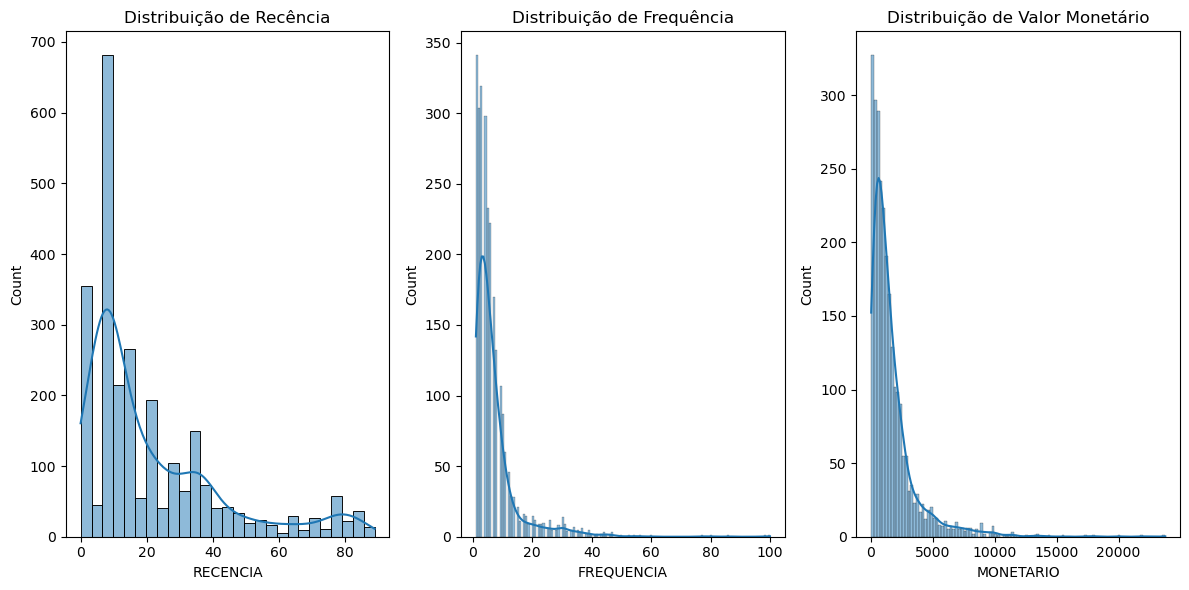

In [178]:

# Exemplo: Supondo que você já tenha um DataFrame com RFM scores para cada cliente
# 'rfm' é um DataFrame com colunas 'Cliente', 'Recencia', 'Frequencia', 'Valor_Monetario'

# Histograma para cada Métrica
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(rfm['RECENCIA'], kde=True)
plt.title('Distribuição de Recência')

plt.subplot(1, 3, 2)
sns.histplot(rfm['FREQUENCIA'], kde=True)
plt.title('Distribuição de Frequência')

plt.subplot(1, 3, 3)
sns.histplot(rfm['MONETARIO'], kde=True)
plt.title('Distribuição de Valor Monetário')
plt.tight_layout()
plt.show()

In [179]:
rfm.describe()

,FREQUENCIA,MONETARIO,RECENCIA
count,2625.000000,2625.000000,2625.000000
mean,7.028952,1675.458781,21.020952
std,8.223576,2018.220314,20.922511
min,1.000000,23.250000,0.000000
25%,3.000000,495.000000,7.000000
50%,5.000000,1078.100000,14.000000
75%,8.000000,2066.600000,30.000000
max,100.000000,23777.700000,89.000000


### Verificamos que média de 
### RECENCIA ESTÁ DE 21 DIAS ,

### DA FREQUENCIA É 7 DIAS 

### DA MONETARIEDADE É 1675,45

## CLIENTES QUE MAIS GASTARAM 

In [180]:
rfm[['NOME_CLIENTE', 'MONETARIO']].sort_values(by='MONETARIO', ascending=False)

,NOME_CLIENTE,MONETARIO
2348,SILVIA SILVA ALENCAR,23777.70
266,BIANCA PEREIRA SOUZA,21939.35
1042,HELENA VALENTIM PEREIRA,20085.75
1,ALEX BORBA SEVERO,18114.15
2196,ROSANA MATOS,17441.80
...,...,...
1251,JULIA ASSAD OLIVEIRA LOPES,24.25
1045,HENRIQUE ALMEIDA,24.25
1905,PATRICIA MENDES AMORIM,24.25
498,CLARICE BRITO CAMPOS,23.25


# CLIENTES MAIS TEMPO SEM COMPRAR

In [181]:
rfm[['NOME_CLIENTE', 'RECENCIA']].sort_values(by='RECENCIA', ascending=False)

,NOME_CLIENTE,RECENCIA
736,FABIANA CORREIA,89
21,ALEX SOARES ESCOBAR,89
60,ALICE XAVIER FIGUEIREDO FERREIRA,89
622,DANILO LACERDA GUSMAO CONSTANTINO,88
1535,LUIZ FIGUEIREDO GOMES,88
...,...,...
598,DANIELA ROSA FONSECA TEIXEIRA,0
592,DANIELA NEVES,0
1679,MARIA SALES LACERDA,0
569,DANIELA BRITO MOREIRA,0


# CLIENTES QUE COMPRARAM COM MAIS FREQUENCIA 

In [182]:
rfm[['NOME_CLIENTE', 'FREQUENCIA']].sort_values(by='FREQUENCIA', ascending=False)

,NOME_CLIENTE,FREQUENCIA
2348,SILVIA SILVA ALENCAR,100
266,BIANCA PEREIRA SOUZA,98
1,ALEX BORBA SEVERO,86
2196,ROSANA MATOS,80
1042,HELENA VALENTIM PEREIRA,77
...,...,...
1324,LAIS ANDRADE,1
485,CESAR SALAZAR ROCHA,1
2164,RODRIGO FERREIRA,1
2158,ROBERTO VIEIRA RAMOS,1


# CLIENTE POR QUANTIDADE POR PRODUTO 

In [183]:
produtos_por_cliente = df_final.groupby(['NOME_CLIENTE', 'NOME_PRODUTO'])['QUANTIDADE'].sum().reset_index().sort_values(by="QUANTIDADE", ascending=False)
produtos_por_cliente

,NOME_CLIENTE,NOME_PRODUTO,QUANTIDADE
1239,BIANCA PEREIRA SOUZA,CAMISETA BASICA DE ALGODAO,21
18,ALEX BORBA SEVERO,REGATA DE VISCOSE,19
5253,HELENA VALENTIM PEREIRA,CAMISETA BASICA DE ALGODAO,19
12058,SILVIA SILVA ALENCAR,REGATA DE VISCOSE,19
1245,BIANCA PEREIRA SOUZA,MEIAS COLORIDAS,18
...,...,...,...
6293,JOSE RAMOS ESCOBAR PINTO,SANDALIAS DE TIRAS,1
6292,JOSE RAMOS ESCOBAR PINTO,MEIAS COLORIDAS,1
6291,JOSE RAMOS ESCOBAR PINTO,CASACO DE LA,1
6289,JOSE RAMOS ESCOBAR PINTO,CALCA JEANS SKINNY,1


### Algumas hipóteses podem ser investigadas. Os clientes que compram em grandes quantidades de um produto só, respondem a uma promoção específicas ou são comerciantes, que compram para revender

# ANALISANDO PRODUTOS
# Produtos que mais vendem 

In [184]:
df_final['NOME_PRODUTO'].value_counts().reset_index()

,NOME_PRODUTO,count
0,CAMISETA BASICA DE ALGODAO,2201
1,MEIAS COLORIDAS,1688
2,REGATA DE VISCOSE,1568
3,CALCA JEANS SKINNY,1466
4,SHORTS DE SARJA,1251
5,SANDALIAS DE TIRAS,963
6,SUETER DE TRICO,936
7,BOLSA DE COURO,930
8,CINTO DE COURO,743
9,TENIS DE CORRIDA,724


# Análise de vendas por período 

In [185]:
#adicionando ao df_final, as colunas com dia, mes, semana e o nome do dia da semana 
df_final['DIA_VENDA'] = df_final['DATA_VENDA'].dt.day
df_final['MES_VENDA'] = df_final['DATA_VENDA'].dt.month
df_final['SEMANA_VENDA'] = df_final['DATA_VENDA'].dt.isocalendar().week
df_final['DIA_DA_SEMANA_VENDA']=df_final['DATA_VENDA'].dt.day_name()



## Dia da semana que mais vende

In [186]:
por_dia = df_final.groupby('DIA_DA_SEMANA_VENDA')['VALOR_VENDA_PRODUTO'].sum().reset_index().sort_values(by='VALOR_VENDA_PRODUTO')
por_dia

,DIA_DA_SEMANA_VENDA,VALOR_VENDA_PRODUTO
1,Monday,20034.30
3,Sunday,281375.45
5,Tuesday,305707.55
4,Thursday,561022.60
6,Wednesday,565778.30
0,Friday,864241.30
2,Saturday,1799919.80


<Axes: xlabel='DIA_DA_SEMANA_VENDA', ylabel='VALOR_VENDA_PRODUTO'>

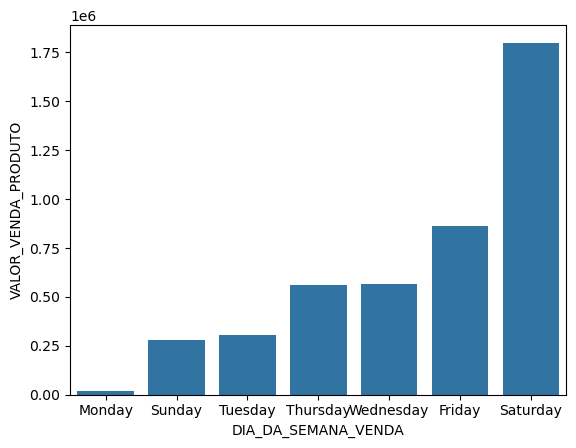

In [187]:
sns.barplot(data=por_dia, y='VALOR_VENDA_PRODUTO', x='DIA_DA_SEMANA_VENDA')


## Semana com mais vendas 

In [188]:
por_semana = df_final.groupby('SEMANA_VENDA')['VALOR_VENDA_PRODUTO'].sum().reset_index().sort_values(by='VALOR_VENDA_PRODUTO')
por_semana

,SEMANA_VENDA,VALOR_VENDA_PRODUTO
0,39,150.00
4,43,131946.20
5,44,145813.80
13,52,190561.40
6,45,201845.55
3,42,213085.60
7,46,275581.15
9,48,318836.80
1,40,349577.05
10,49,398235.90


Semana 39: 25 de setembro a 1º de outubro

Semana 40: 2 de outubro a 8 de outubro

Semana 41: 9 de outubro a 15 de outubro

Semana 42: 16 de outubro a 22 de outubro

Semana 43: 23 de outubro a 29 de outubro

Semana 44: 30 de outubro a 5 de novembro

Semana 45: 6 de novembro a 12 de novembro

Semana 46: 13 de novembro a 19 de novembro

Semana 47: 20 de novembro a 26 de novembro

Semana 48: 27 de novembro a 3 de dezembro

Semana 49: 4 de dezembro a 10 de dezembro

Semana 50: 11 de dezembro a 17 de dezembro

Semana 51: 18 de dezembro a 24 de dezembro

Semana 52: 25 de dezembro a 31 de dezembro

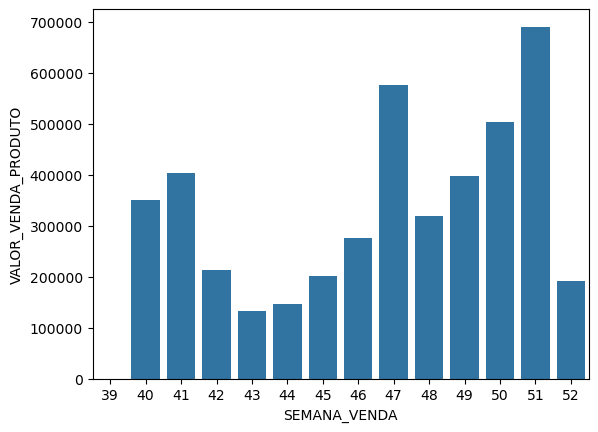

In [189]:
sns.barplot(data=por_semana, y='VALOR_VENDA_PRODUTO', x='SEMANA_VENDA')
plt.show()

### o "boom" acontece na semana 51, semana antes do natal. Destaque também para a semana 47, o boom de vendas nessa semana pode se explicar pela Black friday

## Meses com mais vendas 

In [190]:
por_mes = df_final.groupby('MES_VENDA')['VALOR_VENDA_PRODUTO'].sum().reset_index()
por_mes

,MES_VENDA,VALOR_VENDA_PRODUTO
0,10,1108441.60
1,11,1291339.55
2,12,1998298.15


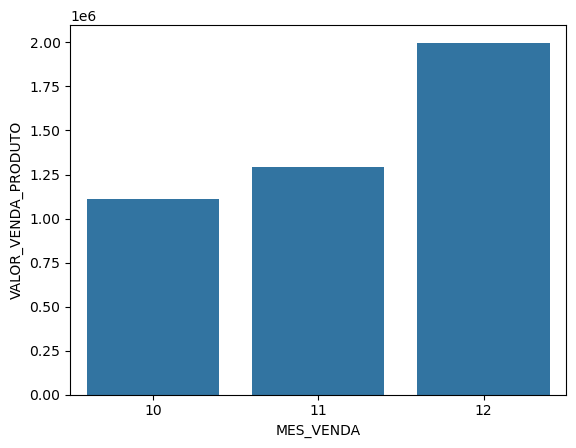

In [191]:
sns.barplot(data=por_mes, y='VALOR_VENDA_PRODUTO', x='MES_VENDA')
plt.show()

### O mês que mais vende-se é o mês de Dezembro, mês onde o comércio é influenciado pelas festas de final de ano e o pagamento de décimo terceiro salário. 

## Como dezembro é o mês que mais vende, analisaremos também qual é o produto que mais vende neste mês.

In [192]:
por_produto = df_final.groupby(['MES_VENDA', 'NOME_PRODUTO'])['QUANTIDADE'].sum().reset_index()


In [193]:
produtos_mais_vendidos_dezembro = por_produto.loc[por_produto['MES_VENDA']==12].sort_values(by='QUANTIDADE', ascending=False)
produtos_mais_vendidos_dezembro

,MES_VENDA,NOME_PRODUTO,QUANTIDADE
66,12,CAMISETA BASICA DE ALGODAO,1663
73,12,MEIAS COLORIDAS,1226
77,12,REGATA DE VISCOSE,1191
64,12,CALCA JEANS SKINNY,1102
82,12,SHORTS DE SARJA,967
80,12,SANDALIAS DE TIRAS,737
83,12,SUETER DE TRICO,715
60,12,BOLSA DE COURO,706
68,12,CINTO DE COURO,559
65,12,CAMISA SOCIAL DE SEDA,503


# ANALISE POR FILIAL
## Vendas por filial

In [194]:
por_filial = df_final.groupby(['NOME_FILIAL', 'CIDADE_FILIAL'])['VALOR_VENDA_PRODUTO'].mean().reset_index().sort_values(by='VALOR_VENDA_PRODUTO', ascending=False)
por_filial

,NOME_FILIAL,CIDADE_FILIAL,VALOR_VENDA_PRODUTO
4,UBERABA,CURITIBA,245.522950
1,BATEL,CURITIBA,241.031732
3,CABRAL,CURITIBA,240.825602
0,AGUA VERDE,CURITIBA,233.988602
2,BOM RETIRO,CURITIBA,233.849680


(200.0, 300.0)

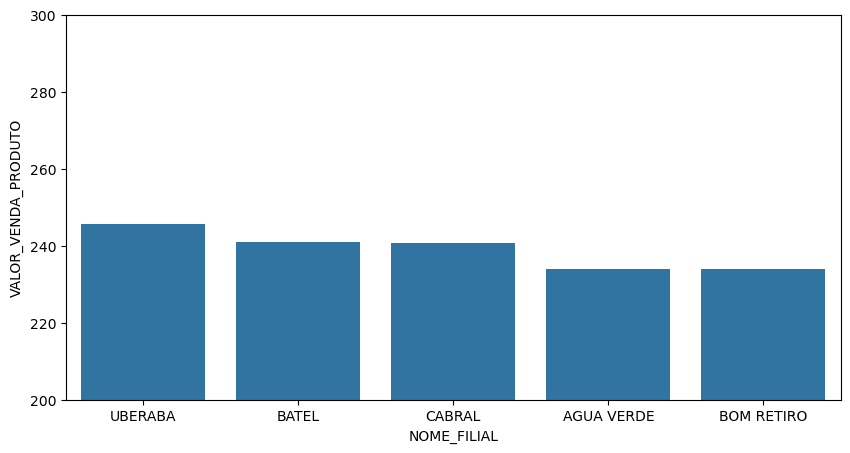

In [195]:
plt.figure(figsize=(10,5))
sns.barplot(data=por_filial, y='VALOR_VENDA_PRODUTO', x='NOME_FILIAL')
plt.ylim(200, 300) 

In [196]:
por_filial.describe()

,VALOR_VENDA_PRODUTO
count,5.000000
mean,239.043713
std,5.040833
min,233.849680
25%,233.988602
50%,240.825602
75%,241.031732
max,245.522950


<Axes: ylabel='VALOR_VENDA_PRODUTO'>

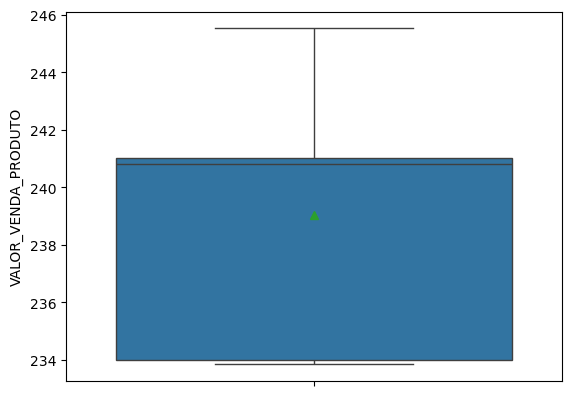

In [197]:
sns.boxplot( y='VALOR_VENDA_PRODUTO', data=por_filial,  showfliers=True, showmeans=True)


### Verifica-se que as filiais vendem relativamente valores aproximados umas das outras. O desvio padrão de 5.04 indica que todos os valores estão bem próximos da média 

### Abaixo, realizei uma verificação se por acaso, o que explica a diferença entre uma filial e outra é o tamano da população do bairro onde fica a filial, pois, a ultima colocada fica em um bairro de 6000 habitantes. Porém, de acordo com a matriz de correlação nos mostra uma correlação baixissima. Logo, minha tese foi descartada

In [198]:
#adicionando coluna com a população do bairro onde fica a filial
df_final['POPULAÇÃO_BAIRRO_DA_FILIAL'] = np.where(df_final['NOME_FILIAL'] == 'BATEL', 12000, 
                             np.where(df_final['NOME_FILIAL'] == 'BOM RETIRO', 6000,
                             np.where(df_final['NOME_FILIAL'] == 'UBERABA', 72056,
                             np.where(df_final['NOME_FILIAL'] == 'CABRAL', 11720,
                             np.where(df_final['NOME_FILIAL'] == 'AGUA VERDE', 49930, None)))))

In [199]:
df_final[['VALOR_VENDA_PRODUTO','POPULAÇÃO_BAIRRO_DA_FILIAL']].corr()

,VALOR_VENDA_PRODUTO,POPULAÇÃO_BAIRRO_DA_FILIAL
VALOR_VENDA_PRODUTO,1.000000,0.001212
POPULAÇÃO_BAIRRO_DA_FILIAL,0.001212,1.000000


# QUANTIDADE DE PRODUTOS VENDIDOS POR CIDADE 

In [200]:
cidades_clientes = df_final['CIDADE_CLIENTE'].value_counts().reset_index()
cidades_clientes


,CIDADE_CLIENTE,count
0,CURITIBA,14225
1,ARAUCARIA,635
2,CAMPO LARGO,609
3,SAO JOSE DOS PINHAIS,555
4,PONTA GROSSA,320
5,JOINVILLE,276
6,BLUMENAU,252
7,CASTRO,224
8,LAPA,217
9,GUARATUBA,202


<Axes: xlabel='count', ylabel='CIDADE_CLIENTE'>

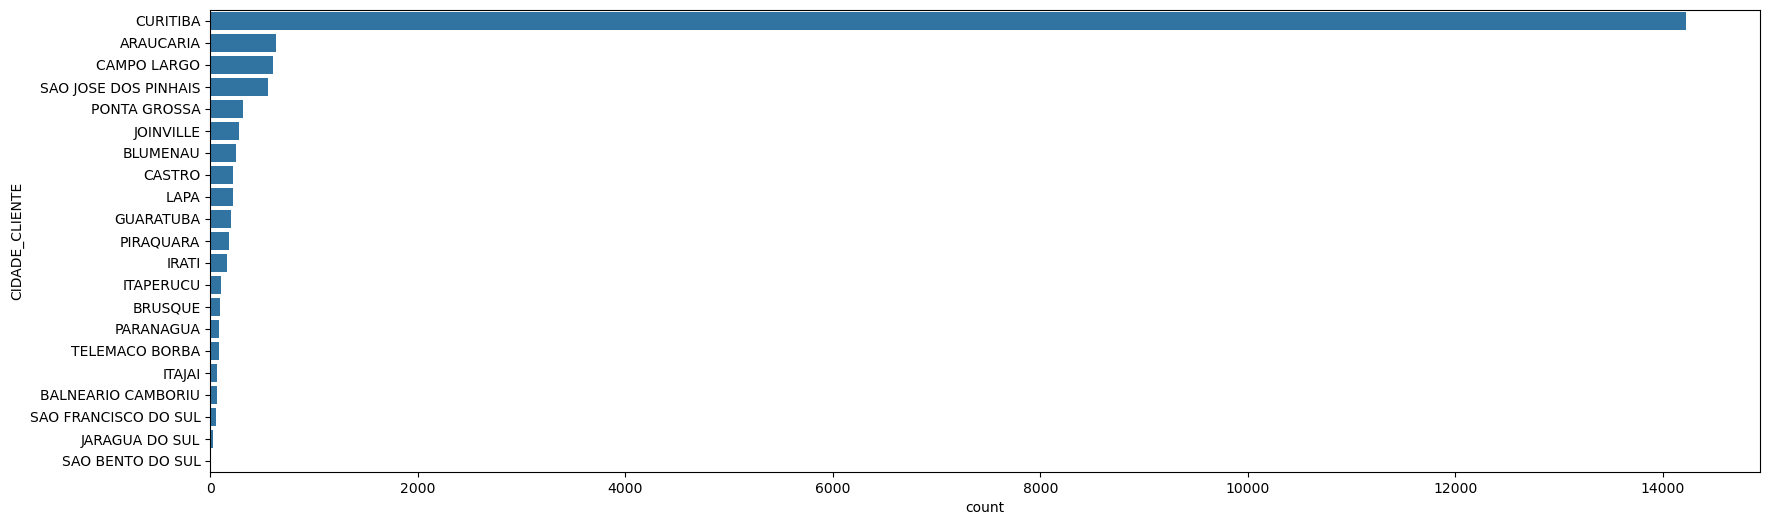

In [201]:
plt.figure(figsize=(20,6))
sns.barplot(data=cidades_clientes, y='CIDADE_CLIENTE', x='count')

# SEGMENTAÇÃO DE PRODUTOS POR CIDADE. QUAL PRODUTO MAIS VENDE EM CADA CIDADE 

In [202]:
quantidade_por_cidade=df_final.groupby(['CIDADE_CLIENTE', 'NOME_PRODUTO'])['QUANTIDADE'].sum().reset_index().sort_values(by='QUANTIDADE')
quantidade_por_cidade

,CIDADE_CLIENTE,NOME_PRODUTO,QUANTIDADE
90,BRUSQUE,PULSEIRA DE MICANGAS,1
275,ITAPERUCU,JAQUETA BOMBER,1
448,SAO BENTO DO SUL,TENIS DE CORRIDA,1
60,BLUMENAU,COLAR COM PINGENTE,1
30,BALNEARIO CAMBORIU,BONE DE BEISEBOL,1
...,...,...,...
180,CURITIBA,SHORTS DE SARJA,1568
162,CURITIBA,CALCA JEANS SKINNY,1847
175,CURITIBA,REGATA DE VISCOSE,1966
171,CURITIBA,MEIAS COLORIDAS,2118


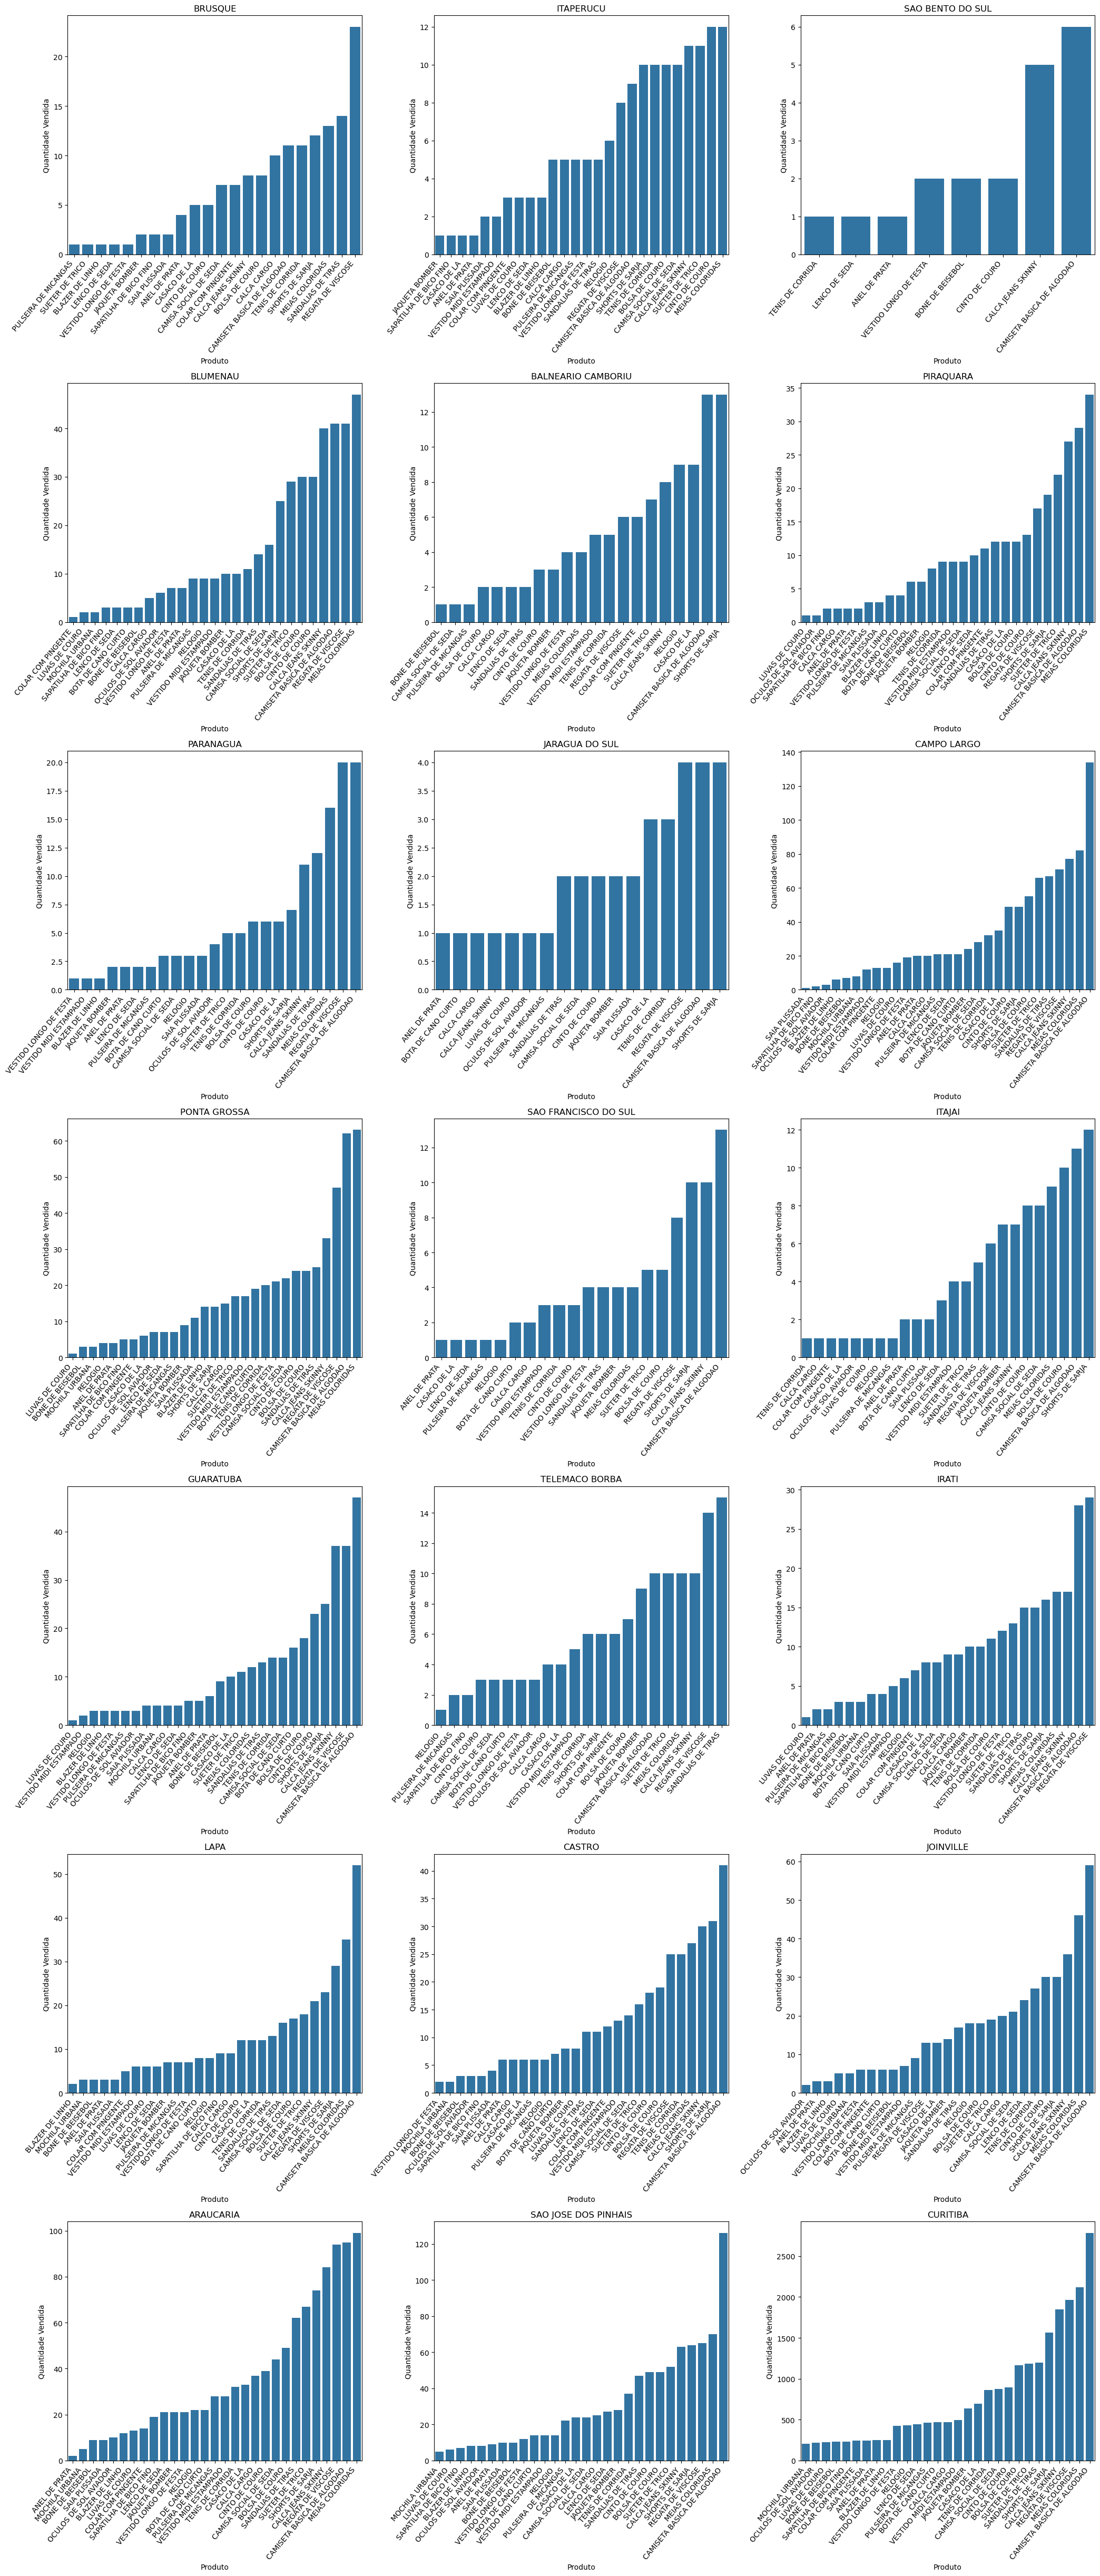

In [203]:
cidades = quantidade_por_cidade['CIDADE_CLIENTE'].unique()

# Número de subplots necessários
num_cidades = len(cidades)
num_cols = 3  # Número de colunas de subplots
num_rows = (num_cidades + num_cols - 1) // num_cols  # Número de linhas de subplots

# Configurar o tamanho da figura
plt.figure(figsize=(num_cols * 7, num_rows * 7))

# Criar subplots
for i, cidade in enumerate(cidades):
    # Selecionar o subplot
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Filtrar dados para a cidade atual
    df_cidade = quantidade_por_cidade[quantidade_por_cidade['CIDADE_CLIENTE'] == cidade]
    
    # Criar gráfico de barras
    sns.barplot(data=df_cidade, x='NOME_PRODUTO', y='QUANTIDADE')
    
    # Configurar título e rótulos
    plt.title(cidade)
    plt.xlabel('Produto')
    plt.ylabel('Quantidade Vendida')
    plt.xticks(rotation=50, ha='right')

# Ajustar layout
plt.tight_layout()
plt.show()


# RECOMENTAÇÕES

## 1. Com base na análise da matriz RFM, é recomendável ativarmos uma campanha de marketing a fim de incentivar compras. Uma boa camapnha de Marketing seria um programa de fidelização, assim, faria com que clientes com indíce de recencia alta comprem com mais frequencia, e os nossos clientes mais valiosos, sintam-se "premiados" por comprar conosco. 
## 2. Na análise quantidade de produtos vendidos por clientes, verificamos alguns clientes que commpram uma quantidade alta de determinados produtos. Precisamos identificar se esses clientes pertencem a um segmento específico como comerciantes e revendedores, a fim de obtermos um tratamento diferenciado, tal qual, um relacionamento B2B. Outra importância de avaliar se estamos tratando com comerciantes e revendedores de nossos protudos, seria preparmos os estoques da loja
## 3 Outra recomendação prática caso, identifiquemos que estamos tratando com clientes que costuma comprar grandes quantidades para revender, pode ser oferecer um programa de parceria onde esses clientes recebem benefícios adicionais, como suporte dedicado, acesso antecipado a novos produtos, ou condições especiais de pagamento.
## 4 Recomendação de focar em produtos que se destacaram na análise como "campeões" em vendas, talvez promovendo-os mais promoções, buscando desconto diretamento com os fornecedores. 
## 5 O grande campeão de vendas é a Camiseta básica de algodão. Uma recomendação prática é analisar quais são os produtos que são geralmente comprados junto com a camiseta de algodão, a fim, de verificarmos uma promoção destes, para que alavanquemos as vendas também destes 
## 6 Ao realizarmos uma segmentação de produtos por cidade, verificamos que, em algumas delas a Camiseta não é a campeão de vendas. Por isso, uma boa recomentação específicas de Marketing para estas regiões. Use esses dados de comportamento para personalizar ofertas e recomendações. Envie promoções direcionadas baseadas em compras passadas ou comportamentos de navegação dos clientes. Utilize e-mails personalizados, recomendações em redes sociais e ofertas exclusivas para aumentar o engajamento.